# Titanic: Machine Learning from Disaster
Link: https://www.kaggle.com/c/titanic
We will try to predict a classification- survival or deceased. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('dataset/kaggle-titanic/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

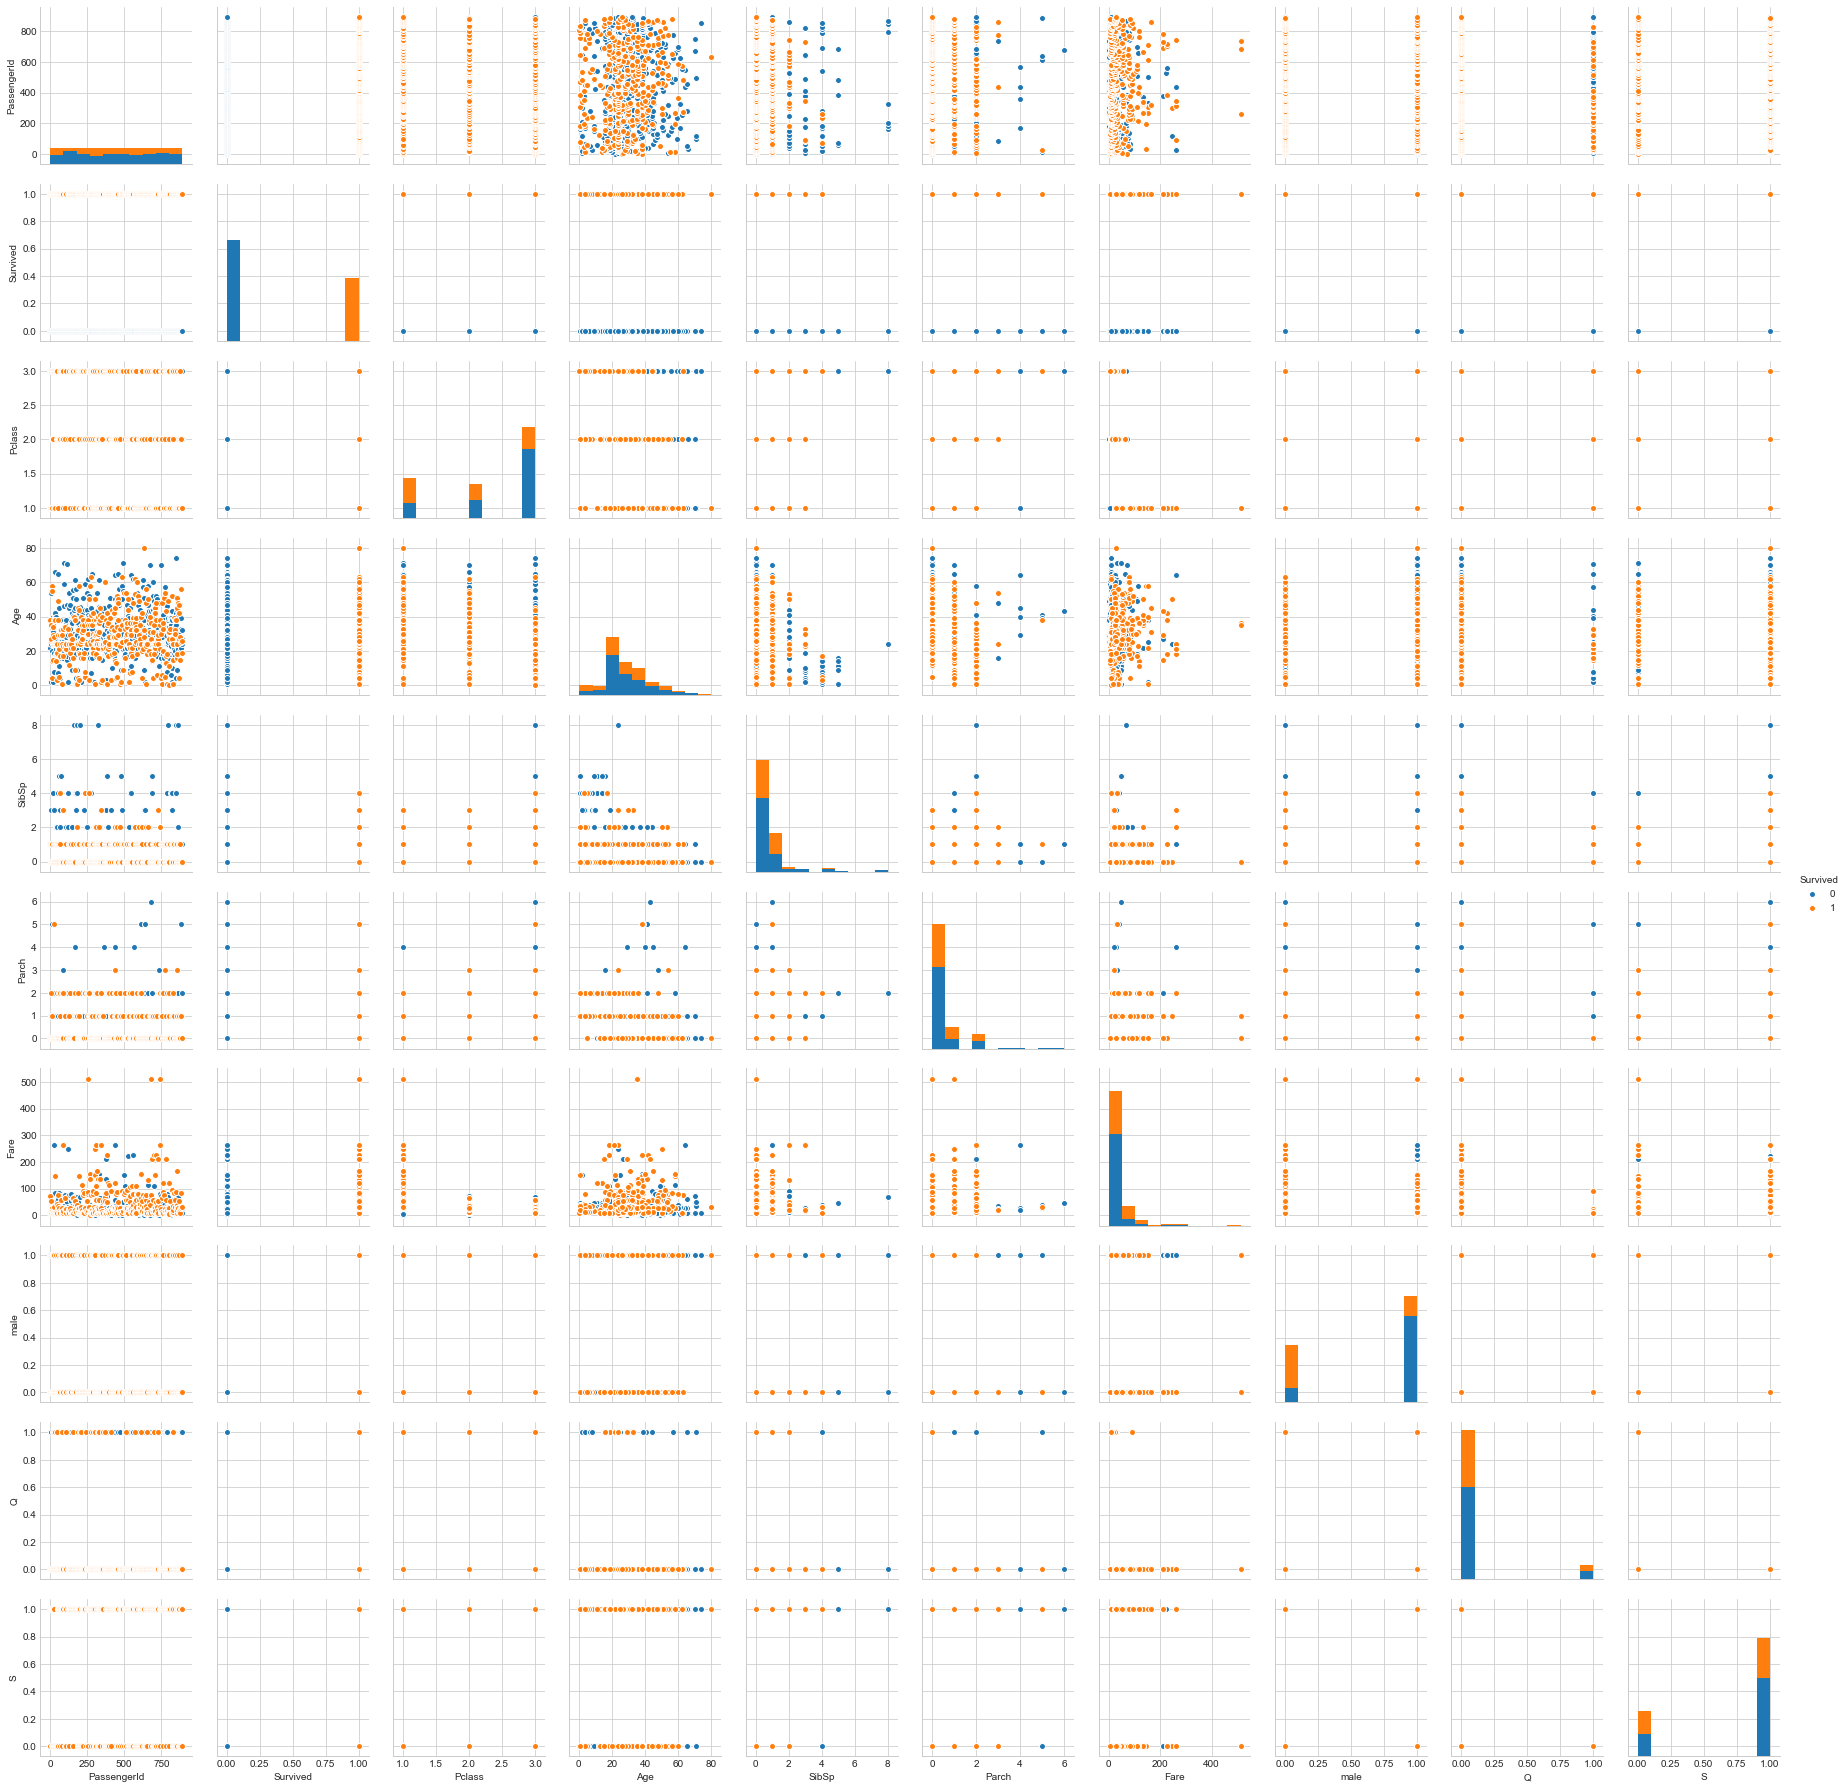

In [42]:
sns.pairplot(train, hue='Survived')

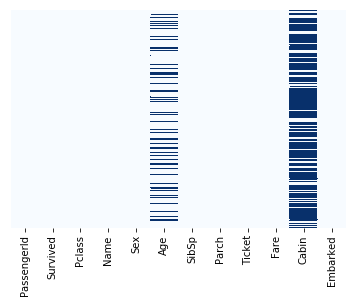

In [5]:
train.isnull()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Blues')

It looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

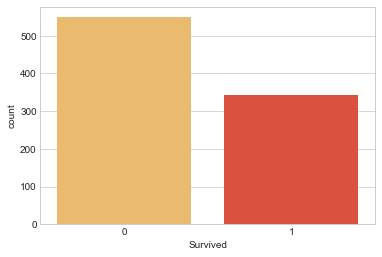

In [6]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', palette='YlOrRd')

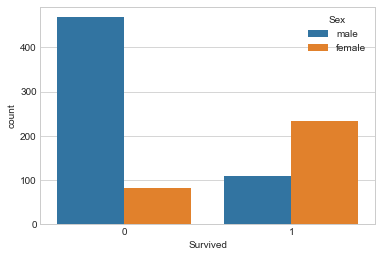

In [7]:
# Esc + y -to convert to code, m-markdown
# Esc + add cell a- above, b-below
# Opt+Ent to run and add cell
sns.countplot(data=train, x='Survived', hue='Sex')

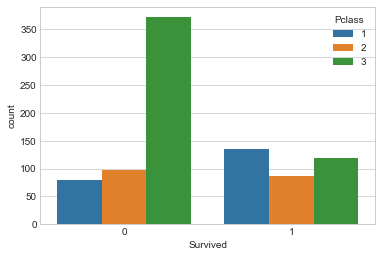

In [8]:
sns.countplot(data=train, x='Survived', hue='Pclass')

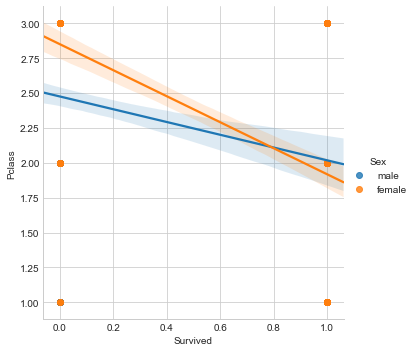

In [9]:
#Linear Regression Model Plot. How total bill affects Bill. 
#Hue will do multiple regression lines in same graph as per catagories. Column='Smoker' will split graph in 2.
#sns.lmplot(data=train, x='TotalBill', y='Bill', hue='IsSmoker') 
sns.lmplot(data=train, x='Survived', y='Pclass', hue='Sex') 

/Users/mk194903/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


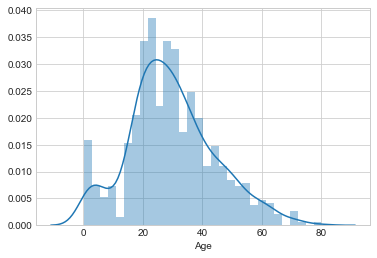

In [10]:
sns.distplot(train['Age'].dropna(), bins=30) # distribution Plot dropna - drop N/A
# or 
#train['Age'].plot.hist()

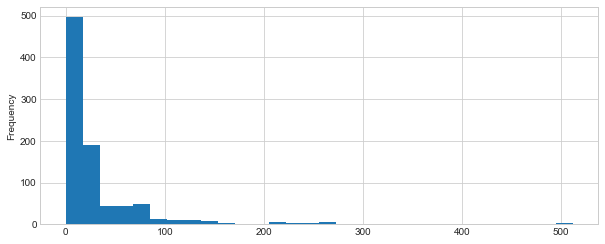

In [11]:
train['Fare'].plot.hist(bins=30, figsize=(10,4))

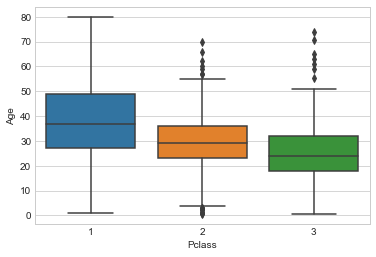

In [12]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [13]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [14]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) # replace blank age with pClass age mean

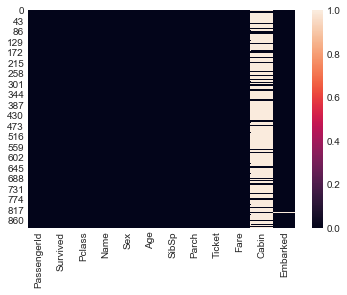

In [15]:
sns.heatmap(data=train.isnull())

In [16]:
train.drop(labels='Cabin', axis=1, inplace=True) # inplace modifies same dataset no need to assign output

In [17]:
train.dropna(inplace=True)

In [18]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [19]:
train.drop(labels=['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

In [20]:
train = pd.concat([train,sex,embark], axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Data is ready

In [22]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

# Building a Logistic Regression model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.30, random_state=101)

In [24]:
#%%time
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

## Evaluation

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87       163
          1       0.85      0.66      0.75       104

avg / total       0.83      0.82      0.82       267



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[151,  12],
       [ 35,  69]])

# Generate Output File for predictions

In [28]:
X_test_Out = pd.read_csv('dataset/kaggle-titanic/titanic_test.csv')

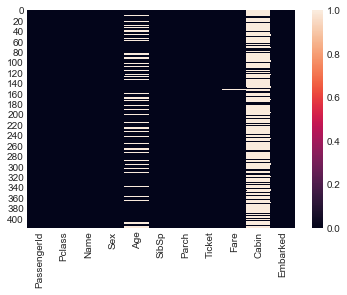

In [29]:
sns.heatmap(data=X_test_Out.isnull())

In [30]:
X_test_Out[(pd.isnull(X_test_Out.Fare))]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


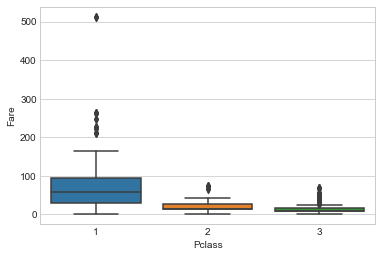

In [31]:
sns.boxplot(data=train, x='Pclass', y='Fare')

In [32]:
#X_test_Out[(pd.isnull(X_test_Out.Fare))].Fare = 10
X_test_Out.loc[152,'Fare'] = 9

In [33]:
X_test_Out['Age'] = X_test_Out[['Age', 'Pclass']].apply(impute_age, axis=1) # replace blank age with pClass age mean

X_test_Out.drop(labels='Cabin', axis=1, inplace=True) # inplace modifies same dataset no need to assign output

sex_o = pd.get_dummies(X_test_Out['Sex'], drop_first=True)
embark_o = pd.get_dummies(X_test_Out['Embarked'], drop_first=True)

X_test_Out.drop(labels=['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

X_test_Out = pd.concat([X_test_Out,sex_o,embark_o], axis=1)

X_test_Out.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


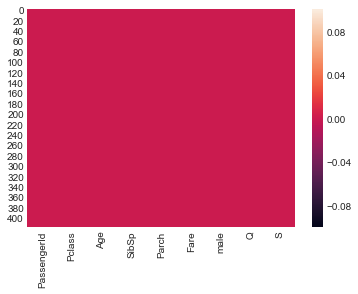

In [34]:
sns.heatmap(data=X_test_Out.isnull())

In [35]:
predictions_Out = logmodel.predict(X_test_Out)
predictions_Out
#pd.to_csv(predictions_Out)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
#import numpy
output = pd.DataFrame(predictions_Out, columns=['Survived'])
output.head()
#numpy.stack([pds[pds.index[i]] for i in range(118)], axis=0)
#output = pd.concat([X_test_Out.PassengerId,output], axis = 1)

,Survived
0,0
1,0
2,0
3,0
4,1


In [37]:
#header = ["PassengerId", "Survived"]
#output.to_csv('titanic_generated_submission.csv', columns = header)
output = pd.concat([X_test_Out.PassengerId,output], axis = 1)

In [39]:
output.set_index('PassengerId', inplace=True)
output.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [40]:
output.to_csv('dataset/kaggle-titanic/titanic_generated_submission.csv')

Kaggle Score - 74.641%